## Chapter 18 Persistence Model for Forecasting

Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

#### Forecast Performance Baseline

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned. The goal is to get a baseline performance on your time series forecast problem as quickly as possible so that you can get to work better understanding the dataset and developing more advanced models. Three properties of a good technique for making a baseline forecast are:
- Simple: A method that requires little or no training or intelligence.
- Fast: A method that is fast to implement and computationally trivial to make a prediction.
- Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

A common algorithm used in establishing a baseline performance is the persistence algorithm.

#### Persistence Algorithm

The most common baseline method for supervised machine learning is the Zero Rule algorithm. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets. The equivalent technique for use with time series dataset is the persistence algorithm.

*The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1)*. This satisfies the three above conditions for a baseline forecast.

#### Persistence Algorithm Steps
1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
series = pd.read_csv('data/shampoo-sales.csv', index_col=0)
# baseline the year number on an arbitrary year (1900)
series.index = pd.to_datetime("190" + series.index.astype(str), format="%Y-%m")
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


##### Step 1: Define the Supervised Learning Problem

In [18]:
# create lagge dataset: given observation at t, predict observation at t+1
values = pd.DataFrame(series['Sales'].values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
df.head()

,t,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


##### Step 2: Train and Test Sets

In [20]:
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

##### Step 3: Persistence Algorithm

In [21]:
# persistence model
def model_persistence(x):
  """ We can define our persistence model as a function that returns the value provided as input """
  return x

##### Step 4: Make and Evaluate Forecast

In [23]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 133.156


##### Step 5: Complete Example

Finally, a plot is made to show the training dataset and the diverging predictions from the expected values from the test dataset. From the plot of the persistence model predictions, it is clear that the model is one-step behind reality. There is a rising trend and month-to-month
noise in the sales figures, which highlights the limitations of the persistence technique.

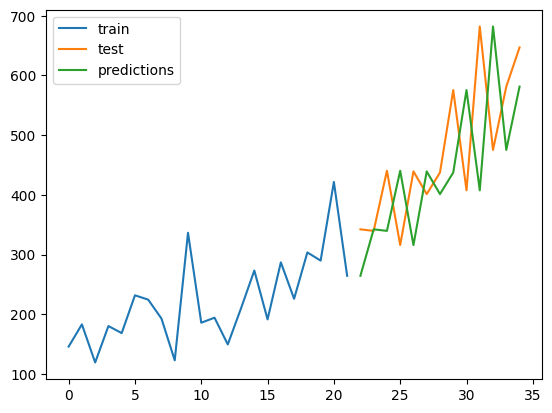

In [27]:
# plot predictions and expected results
plt.plot(train_y, label='train')
plt.plot([None for i in train_y] + [x for x in test_y], label='test')
plt.plot([None for i in train_y] + [x for x in predictions], label='predictions')
plt.legend()
plt.show()

The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate.